In [ ]:
"""Problem 2
Proszę o pobranie danych ze źródła:
https://www.kaggle.com/datasets/blastchar/telco-customer-churn

Zbiór danych zawiera informacje o klientach, którzy odeszli w ciągu ostatniego miesiąca – kolumna Churn. Usługi, na które zapisał się każdy klient – telefon, wiele linii, internet, bezpieczeństwo online, kopie zapasowe online, ochrona urządzeń, pomoc techniczna oraz streaming TV i filmów. Informacje o koncie klienta – jak długo jest klientem, umowa, metoda płatności, rozliczenia elektroniczne, opłaty miesięczne i opłaty całkowite. Informacje demograficzne o klientach – płeć, przedział wiekowy oraz to, czy mają partnerów i osoby na utrzymaniu. Każdy wiersz reprezentuje klienta, każda kolumna zawiera atrybuty klienta. Co to jest rezygnacja klienta 'Customer Churn'? Odejście klienta definiuje się jako sytuację, w której klienci lub abonenci zaprzestają współpracy z firmą lub usługą. 

Wykorzystując model drzewa decyzyjnego, lasów losowych i lasów ze wzmocnieniem, należy przewidywać zachowania klientów.

1. Przygotowanie danych:
1.1. Wczytanie danych, sprawdzenie typów danych i kompletności danych, podstawowe statystyki.
1.2. Utworzenie wykresu słupkowego ilości wystąpień kategorii dotyczącej atrybutu warunkowego. 
1.3. Wykres pudełkowy opłat całkowitych w zależności od klientów, którzy odeszli w ciągu ostatniego miesiąca.
1.4. Wykres pudełkowy opłat całkowitych w zależności od rodzaju umowy z uwzględnieniem, klientów, którzy odeszli w ciągu ostatniego miesiąca 'Churn'.
1.5. Utwórz wykres słupkowy wielkości korelacji z wyłączeniem cech ('customerID','tenure','MonthlyCharges', 'TotalCharges') z Churn yes. Niektóre kolumny kategorialne należy przekonwertować na zmienne fikcyjne.
1.6. Jakie są rodzaje zawieranych umów?
1.7. Utwórz histogram przedstawiający rozkład kolumny dotyczącej stażu pracy 'tenure'.
1.8. Utwórz histogram przedstawiający rozkład kolumny 'tenure' różnicowany za pomocą klientów, którzy odeszli w ciągu ostatniego miesiąca i typu umowy.
1.9. Traktując każdą unikalną grupę 'tenure' jako kohortę, obliczyć współczynnik rezygnacji (procent osób, które miały rezygnację na tak) na kohortę. Na przykład w kohorcie, której staż pracy wynosił 1 miesiąc, wskaźnik rezygnacji powinien wynosić 61,99%. Kohorty trwające od 1 do 72 miesięcy. z ogólną tendencją im dłuższy staż pracy, tym mniejszy współczynnik rezygnacji. 
1.10. Wykres zależności współczynnika rezygnacji od 'tenure' w miesiącach.
1.11. Na podstawie wartości kolumny 'tenure' stwórz nową kolumnę (np. 'tenure cohorts'), która odnosi się do długości 'tenure', który jest podzielony na 4 grupy:'0-12 Months', '12-24 Months', '24-48 Months', 'Over 48 Months'.
1.12. Wykres pudełkowy długości stażu z podziałem na 4 grupy w zależności od Churn.
1.13. Podział danych na cechy (wartości numeryczne) oraz etykiety. Należy stworzyć DataFrame z odpowiednimi zmiennymi fikcyjnymi. Należy pamiętać, że niektóre kolumny można pominąć.
1.14. Podział zbioru danych na treningowy i testowy, gdzie zbiór testowy stanowi 10% całego zbioru danych, random_state = 101."""

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
# 1.1 Wczytanie danych, sprawdzenie typów danych i kompletności danych, podstawowe statystyki.
df = pd.read_csv('./Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7027  6840-RESVB    Male              0     Yes        Yes      24   
7028  2234-XADUH  Female              0     Yes        Yes      72   
7029  4801-JZAZL  Female              0     Yes        Yes      11   
7030  8361-LTMKD    Male              1     Yes         No       4   
7031  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

In [62]:
#brak braków danych
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

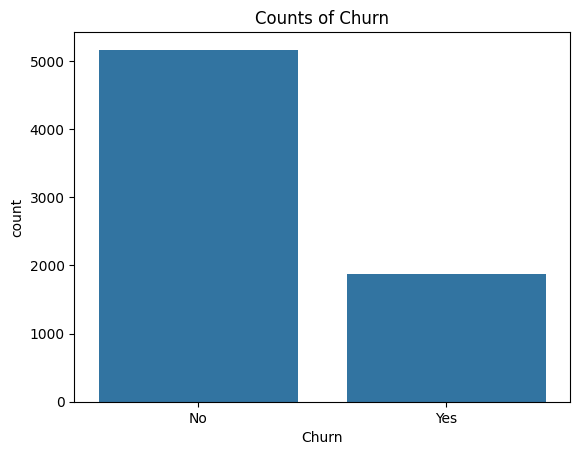

In [63]:
# 1.2 Utworzenie wykresu słupkowego ilości wystąpień kategorii dotyczącej atrybutu warunkowego.
sns.countplot(x='Churn', data=df)
plt.title('Counts of Churn')
plt.show()

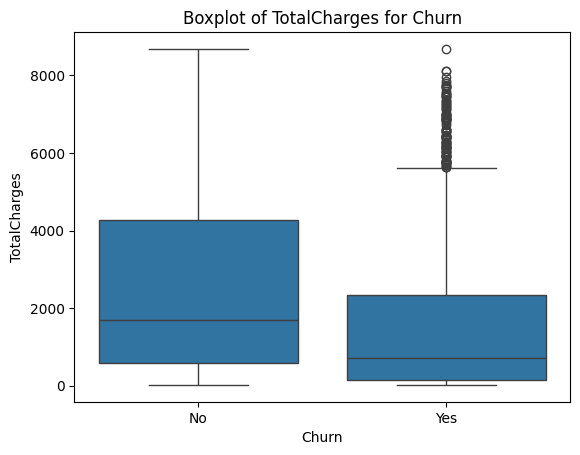

In [64]:
# 1.3 Wykres pudełkowy opłat całkowitych w zależności od klientów, którzy odeszli w ciągu ostatniego miesiąca.
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Boxplot of TotalCharges for Churn')
plt.show()

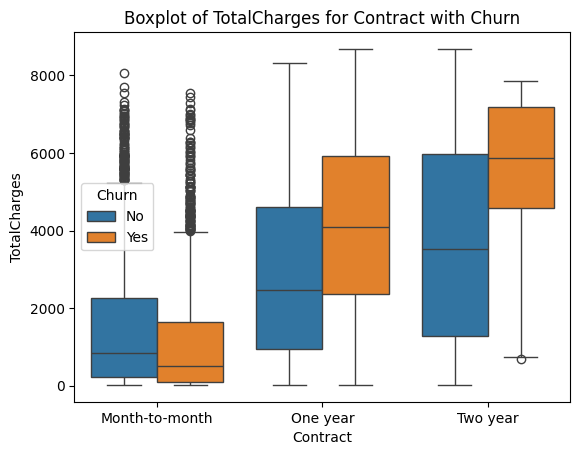

In [65]:
# 1.4 Wykres pudełkowy opłat całkowitych w zależności od rodzaju umowy z uwzględnieniem, klientów, którzy odeszli w ciągu ostatniego miesiąca 'Churn'.
sns.boxplot(x='Contract', y='TotalCharges', hue='Churn', data=df)
plt.title('Boxplot of TotalCharges for Contract with Churn')
plt.show()

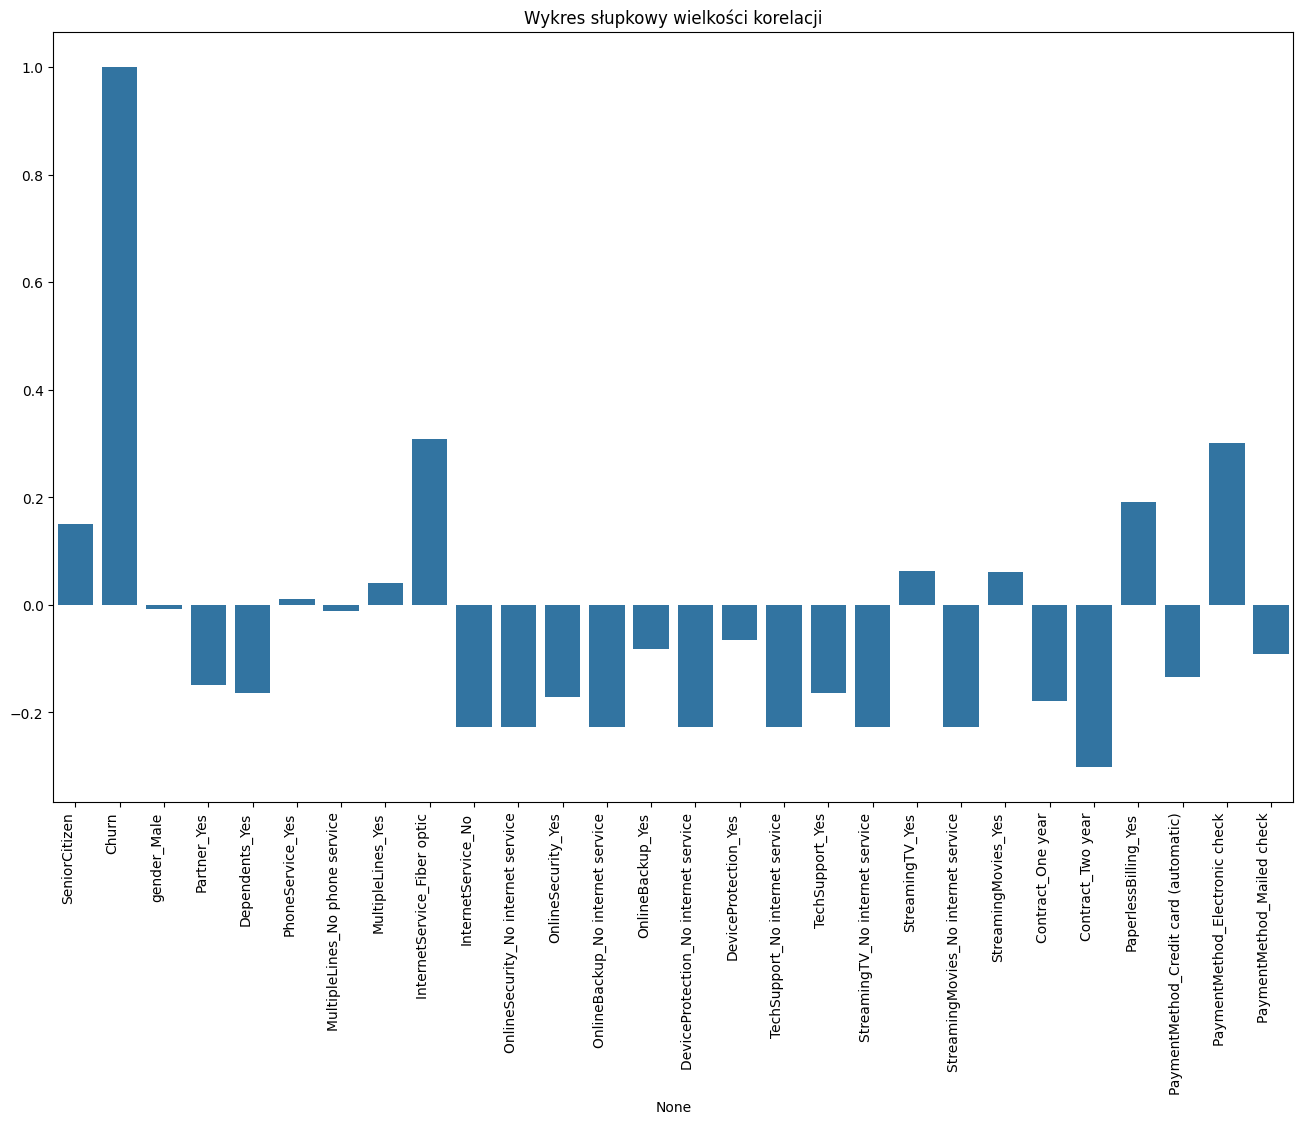

In [6]:
# 1.5. Utwórz wykres słupkowy wielkości korelacji z wyłączeniem cech ('customerID','tenure','MonthlyCharges', 'TotalCharges') z Churn yes. Niektóre kolumny kategorialne należy przekonwertować na zmienne fikcyjne.

#mapowanie kolumny churn na klasyfikacje binarną
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

corr_data = df.drop(['customerID','tenure','MonthlyCharges', 'TotalCharges'], axis=1)
corr_data = pd.get_dummies(corr_data, drop_first=True)
corr_matrix = corr_data.corr()

plt.figure(figsize=(16,10))
sns.barplot(x=corr_matrix['Churn'].index, y=corr_matrix['Churn'].values)
plt.title('Wykres słupkowy wielkości korelacji')
plt.xticks(rotation=90, ha='right')
plt.show()

In [11]:
# 1.6 Jakie są rodzaje zawieranych umów?
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

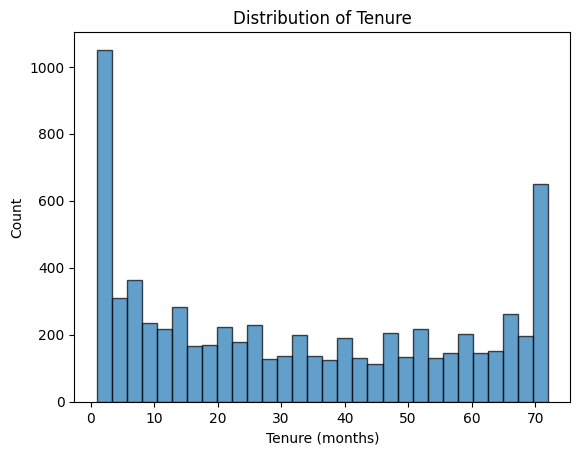

In [12]:
# 1.7 Utwórz histogram przedstawiający rozkład kolumny dotyczącej stażu pracy 'tenure'.
plt.hist(df['tenure'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.show()

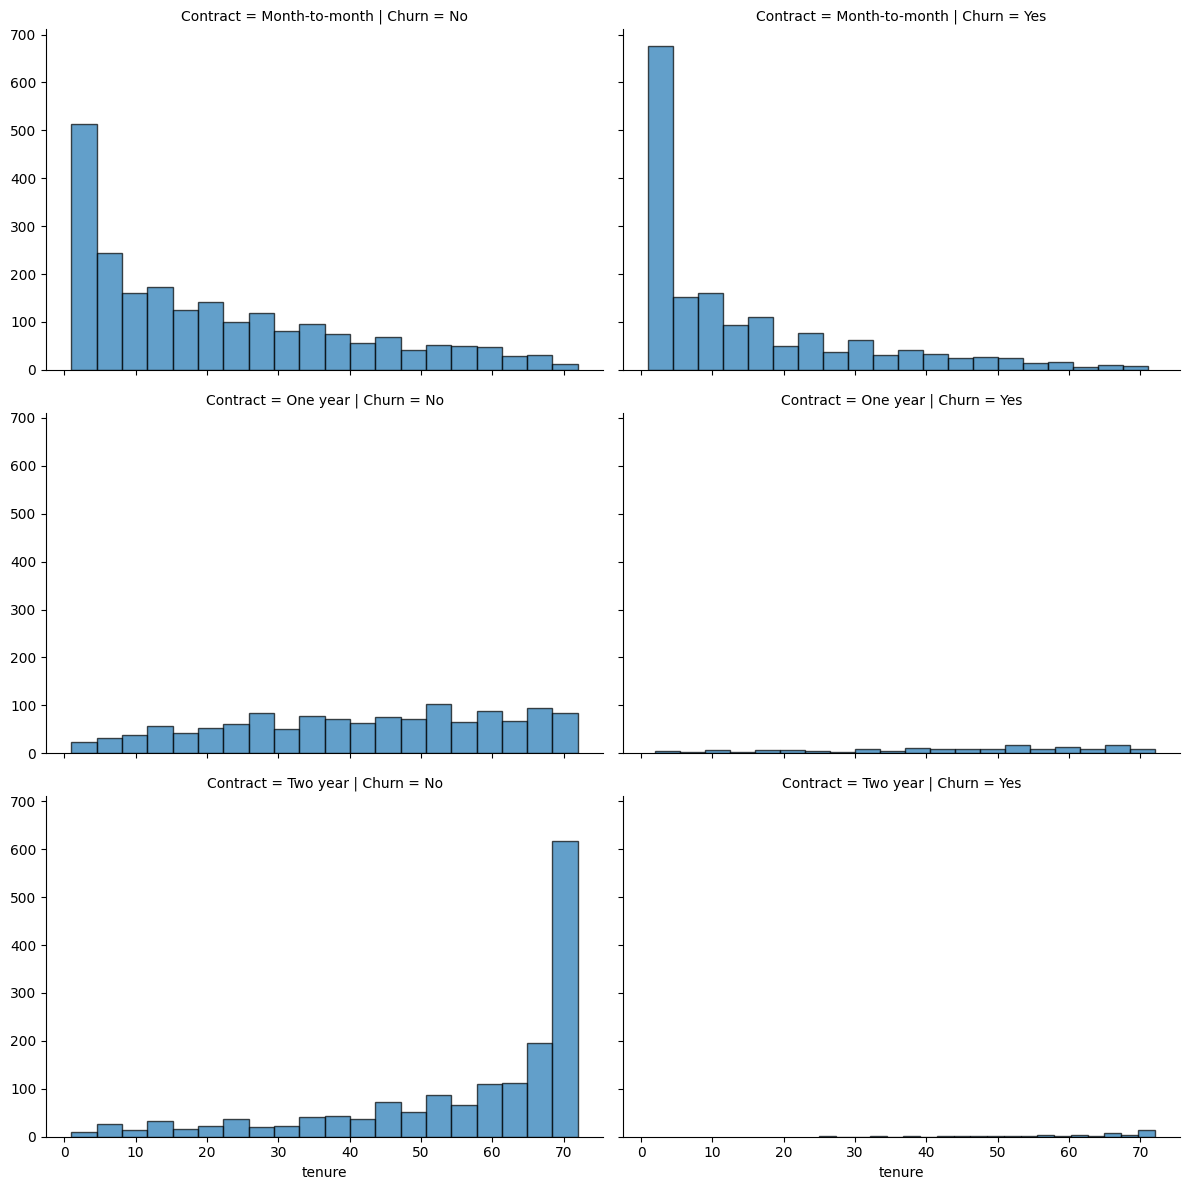

In [13]:
# 1.8 Utwórz histogram przedstawiający rozkład kolumny 'tenure' różnicowany za pomocą klientów, którzy odeszli w ciągu ostatniego miesiąca i typu umowy.
g = sns.FacetGrid(df, col='Churn', row='Contract', height=4, aspect=1.5)
g.map(plt.hist, 'tenure', bins=20, edgecolor='k', alpha=0.7)
plt.show()

In [25]:
# 1.9. Traktując każdą unikalną grupę 'tenure' jako kohortę, obliczyć współczynnik rezygnacji (procent osób, które miały rezygnację na tak) na kohortę. Na przykład w kohorcie, której staż pracy wynosił 1 miesiąc, wskaźnik rezygnacji powinien wynosić 61,99%. Kohorty trwające od 1 do 72 miesięcy. z ogólną tendencją im dłuższy staż pracy, tym mniejszy współczynnik rezygnacji. 

df['Churn_numeric'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
cohorts = df.groupby('tenure')['Churn_numeric'].mean() * 100
cohorts

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: Churn_numeric, Length: 72, dtype: float64

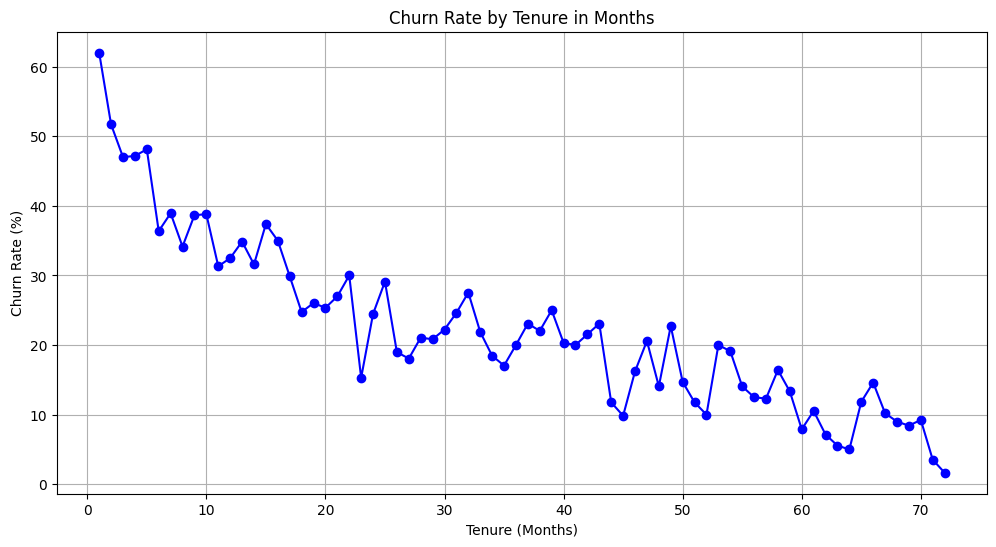

In [23]:
# 1.10. Wykres zależności współczynnika rezygnacji od 'tenure' w miesiącach.
plt.figure(figsize=(12, 6))
plt.plot(cohorts.index, cohorts.values, marker='o', linestyle='-', color='b')
plt.title('Churn Rate by Tenure in Months')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate (%)')
plt.grid(True)
plt.show()

In [26]:
# 1.11. Na podstawie wartości kolumny 'tenure' stwórz nową kolumnę (np. 'tenure cohorts'), która odnosi się do długości 'tenure', który jest podzielony na 4 grupy:'0-12 Months', '12-24 Months', '24-48 Months', 'Over 48 Months'.
df['tenure cohorts'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, df['tenure'].max()+1],
                              labels=['0-12 Months', '12-24 Months', '24-48 Months', 'Over 48 Months'],
                              right=False)

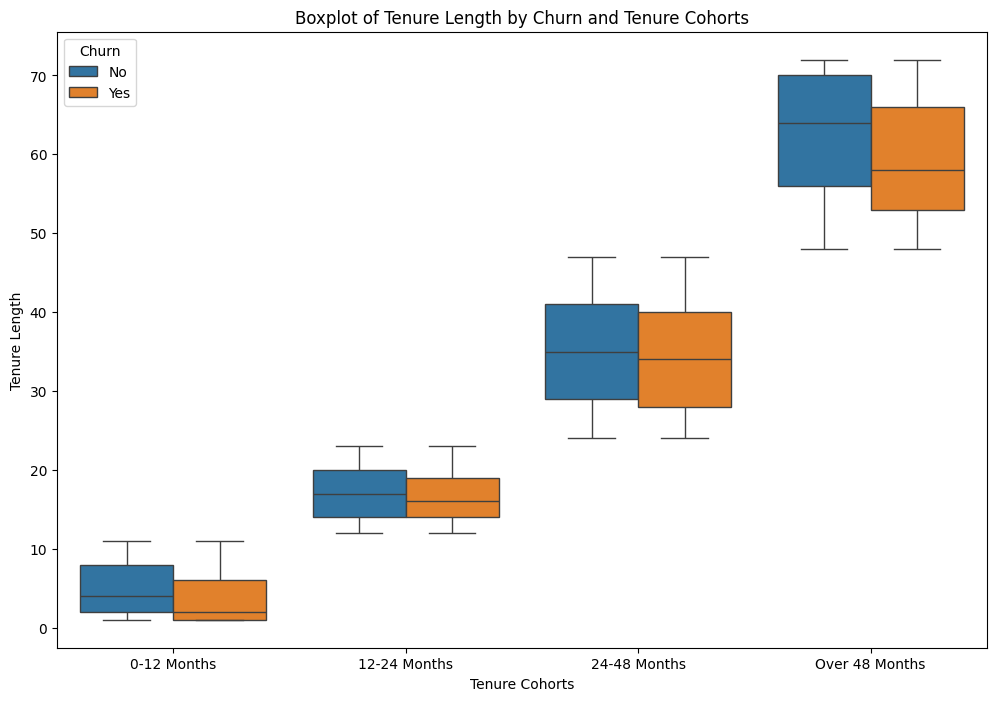

In [27]:
# 1.12. Wykres pudełkowy długości stażu z podziałem na 4 grupy w zależności od Churn.
plt.figure(figsize=(12, 8))
sns.boxplot(x='tenure cohorts', y='tenure', hue='Churn', data=df)
plt.title('Boxplot of Tenure Length by Churn and Tenure Cohorts')
plt.xlabel('Tenure Cohorts')
plt.ylabel('Tenure Length')
plt.show()

In [42]:
# 1.13 Podział danych na cechy (wartości numeryczne) oraz etykiety.
features = df.drop(['Churn', 'Churn_numeric', 'tenure cohorts', 'customerID'], axis=1)
labels = df['Churn_numeric']

In [44]:
# 1.14 Podział zbioru danych na treningowy i testowy, gdzie zbiór testowy stanowi 10% całego zbioru danych, random_state = 101.

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=101)

print(len(X_train))
print(len(X_test))

6328
704


In [ ]:
"""2. Model drzewa decyzyjnego:
2.1. Zastosowanie klasyfikatora drzewa decyzyjnego dla maksymalna wysokości drzewa równej 6. 
2.2. Wyświetl raport z klasyfikacji oraz macierz błędów i drzewo decyzyjne na podstawie predykcji na zbiorze testowym.
2.3. Informacja nt. wagi cech. """

In [46]:
# Sprawdzenie brakujących danych
missing_data = df.isnull().sum()
print("Brakujące dane:\n", missing_data)

# Utworzenie zmiennych binarnych (dummy variables) dla kategorii
df = pd.get_dummies(df, drop_first=True)

Brakujące dane:
 SeniorCitizen                    0
tenure                           0
MonthlyCharges                   0
TotalCharges                     0
Churn_numeric                    0
                                ..
PaymentMethod_Mailed check       0
Churn_Yes                        0
tenure cohorts_12-24 Months      0
tenure cohorts_24-48 Months      0
tenure cohorts_Over 48 Months    0
Length: 7066, dtype: int64


In [49]:
# Stworzenie instancji kodera etykiet
label_encoder = LabelEncoder()

# Iteracja po kolumnach i stosowanie kodowania etykiet
for column in X_train.columns:
    if X_train[column].dtype == 'object':
        X_train[column] = label_encoder.fit_transform(X_train[column])
        X_test[column] = label_encoder.transform(X_test[column])

Raport z klasyfikacji:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87       557
           1       0.51      0.53      0.52       147

    accuracy                           0.79       704
   macro avg       0.69      0.70      0.69       704
weighted avg       0.80      0.79      0.80       704

Macierz błędów:
 [[481  76]
 [ 69  78]]


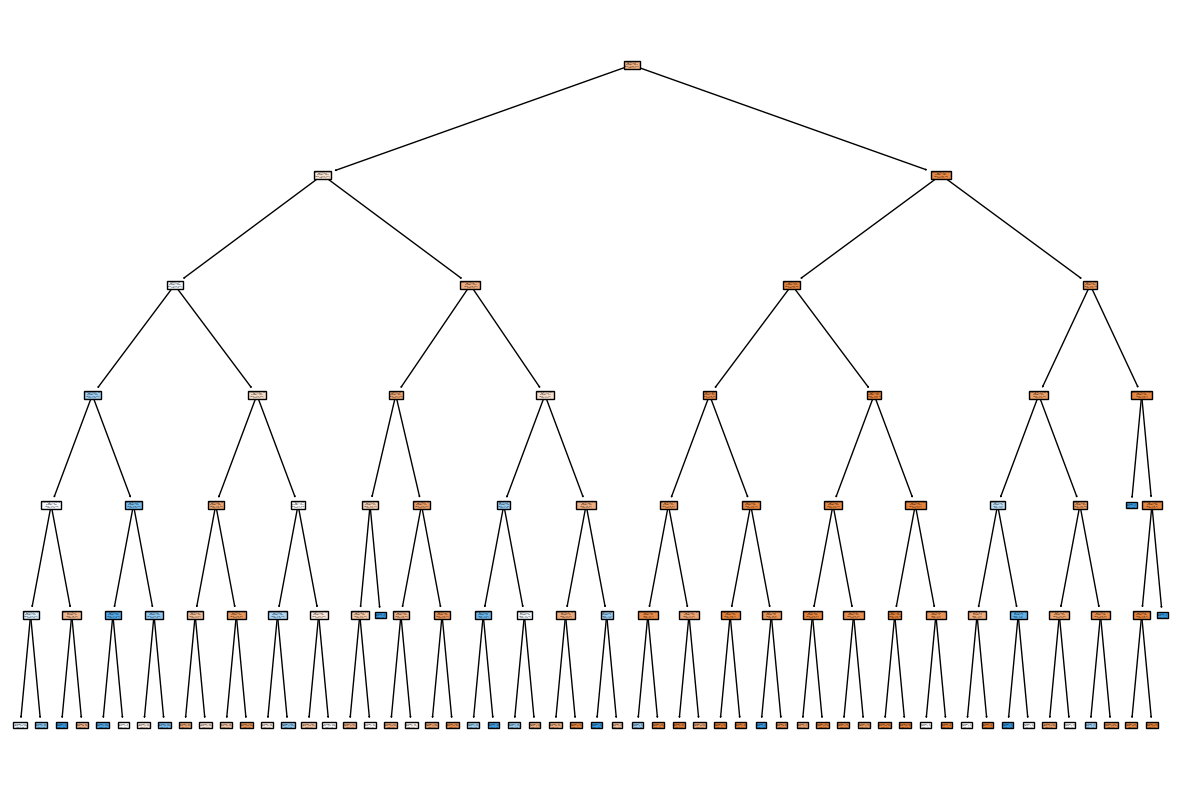

Waga cech:
gender: 0.002984590595960124
SeniorCitizen: 0.013110882549836016
Partner: 0.0
Dependents: 0.0
tenure: 0.11588080092949792
PhoneService: 0.005478904263625607
MultipleLines: 0.002005883338778416
InternetService: 0.0839465937763921
OnlineSecurity: 0.12546661896017608
OnlineBackup: 0.009253037215983225
DeviceProtection: 0.0
TechSupport: 0.006465921432831361
StreamingTV: 0.005339686324566683
StreamingMovies: 0.0014013484895118989
Contract: 0.4998529378390318
PaperlessBilling: 0.006924892428979147
PaymentMethod: 0.01205083633936906
MonthlyCharges: 0.06331196718549052
TotalCharges: 0.04652509832996974


In [51]:
# Inicjalizacja i trenowanie modelu drzewa decyzyjnego
tree_classifier = DecisionTreeClassifier(max_depth=6, random_state=101)
tree_classifier.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = tree_classifier.predict(X_test)

# Wyświetlenie raportu z klasyfikacji
print("Raport z klasyfikacji:\n", classification_report(y_test, y_pred))

# Wyświetlenie macierzy błędów
print("Macierz błędów:\n", confusion_matrix(y_test, y_pred))

# Wyświetlenie drzewa decyzyjnego
plt.figure(figsize=(15, 10))
plot_tree(tree_classifier, filled=True, feature_names=list(X_train.columns), class_names=['No', 'Yes'])
plt.show()

# Informacje nt. wagi cech
feature_importance = tree_classifier.feature_importances_
feature_names = X_train.columns
feature_importance_dict = dict(zip(feature_names, feature_importance))

print("Waga cech:")
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance}")

In [ ]:
"""3. Model lasów losowych:
3.1. Zastosowanie klasyfikatora lasów losowych, gdzie liczba drzew klasyfikacyjnych, które będą tworzyły las jest równa 100.
3.2. Wyświetl raport z klasyfikacji oraz macierz błędów na podstawie predykcji na zbiorze testowym."""

In [52]:
# Inicjalizacja i trenowanie modelu lasów losowych
forest_classifier = RandomForestClassifier(n_estimators=100, random_state=101)
forest_classifier.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred_forest = forest_classifier.predict(X_test)

# Raport z klasyfikacji
classification_rep_forest = classification_report(y_test, y_pred_forest)
print("Raport z klasyfikacji (Las losowy):\n", classification_rep_forest)

# Macierz błędów
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
print("Macierz błędów (Las losowy):\n", conf_matrix_forest)

Raport z klasyfikacji (Las losowy):
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       557
           1       0.52      0.47      0.49       147

    accuracy                           0.80       704
   macro avg       0.69      0.68      0.68       704
weighted avg       0.79      0.80      0.79       704

Macierz błędów (Las losowy):
 [[493  64]
 [ 78  69]]


In [ ]:
"""4. Model lasów ze wzmocnieniem:
4.1. Zastosowanie klasyfikatora lasów ze wzmocnieniem, gdzie liczba drzew klasyfikacyjnych, które będą tworzyły las jest równa 100.
4.2. Wyświetl raport z klasyfikacji oraz macierz błędów na podstawie predykcji na zbiorze testowym."""

In [53]:
# Inicjalizacja i trenowanie modelu lasów ze wzmocnieniem
boosting_classifier = GradientBoostingClassifier(n_estimators=100, random_state=101)
boosting_classifier.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred_boosting = boosting_classifier.predict(X_test)

# Raport z klasyfikacji
classification_rep_boosting = classification_report(y_test, y_pred_boosting)
print("Raport z klasyfikacji (Las ze wzmocnieniem):\n", classification_rep_boosting)

# Macierz błędów
conf_matrix_boosting = confusion_matrix(y_test, y_pred_boosting)
print("Macierz błędów (Las ze wzmocnieniem):\n", conf_matrix_boosting)

Raport z klasyfikacji (Las ze wzmocnieniem):
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       557
           1       0.57      0.52      0.54       147

    accuracy                           0.82       704
   macro avg       0.72      0.71      0.71       704
weighted avg       0.81      0.82      0.81       704

Macierz błędów (Las ze wzmocnieniem):
 [[500  57]
 [ 71  76]]


In [ ]:
"""5. Porównanie klasyfikatorów drzewiastych:
5.1. Który klasyfikator działa najlepiej? 
5.2. Zastosować metodę przesukiwania siatki w celu doboru optymalnych parametrów i zbudowanie odpowiednio modelu drzewa decyzyjnego, lasu losowego i lasu ze wzmocnieniem.
5.3. Który klasyfikator działa najlepiej? Który model zoptymalizowany wykazał największą poprawę klasyfikacji względem klasyfikatora niezoptymalizowanego?"""

In [54]:
# Parametry do przeszukiwania siatki dla każdego klasyfikatora
param_grid_decision_tree = {
    'max_depth': [3, 6, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_random_forest = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_boosting = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9]
}

# Przeszukiwanie siatki dla drzewa decyzyjnego
grid_search_decision_tree = GridSearchCV(DecisionTreeClassifier(random_state=101), param_grid_decision_tree, cv=5, scoring='accuracy')
grid_search_decision_tree.fit(X_train, y_train)

# Przeszukiwanie siatki dla lasu losowego
grid_search_random_forest = GridSearchCV(RandomForestClassifier(random_state=101), param_grid_random_forest, cv=5, scoring='accuracy')
grid_search_random_forest.fit(X_train, y_train)

# Przeszukiwanie siatki dla lasu ze wzmocnieniem
grid_search_boosting = GridSearchCV(GradientBoostingClassifier(random_state=101), param_grid_boosting, cv=5, scoring='accuracy')
grid_search_boosting.fit(X_train, y_train)

# Najlepsze parametry dla każdego klasyfikatora
best_params_decision_tree = grid_search_decision_tree.best_params_
best_params_random_forest = grid_search_random_forest.best_params_
best_params_boosting = grid_search_boosting.best_params_

# Najlepsze modele dla każdego klasyfikatora
best_model_decision_tree = grid_search_decision_tree.best_estimator_
best_model_random_forest = grid_search_random_forest.best_estimator_
best_model_boosting = grid_search_boosting.best_estimator_

# Porównanie wyników
print("Najlepsze parametry dla drzewa decyzyjnego:", best_params_decision_tree)
print("Najlepsze parametry dla lasu losowego:", best_params_random_forest)
print("Najlepsze parametry dla lasu ze wzmocnieniem:", best_params_boosting)

# Predykcja na zbiorze testowym dla najlepszych modeli
y_pred_decision_tree = best_model_decision_tree.predict(X_test)
y_pred_random_forest = best_model_random_forest.predict(X_test)
y_pred_boosting = best_model_boosting.predict(X_test)

# Wyświetlenie raportów z klasyfikacji dla każdego modelu
classification_rep_decision_tree = classification_report(y_test, y_pred_decision_tree)
classification_rep_random_forest = classification_report(y_test, y_pred_random_forest)
classification_rep_boosting = classification_report(y_test, y_pred_boosting)

print("Raport z klasyfikacji dla drzewa decyzyjnego:\n", classification_rep_decision_tree)
print("Raport z klasyfikacji dla lasu losowego:\n", classification_rep_random_forest)
print("Raport z klasyfikacji dla lasu ze wzmocnieniem:\n", classification_rep_boosting)

Najlepsze parametry dla drzewa decyzyjnego: {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}
Najlepsze parametry dla lasu losowego: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Najlepsze parametry dla lasu ze wzmocnieniem: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Raport z klasyfikacji dla drzewa decyzyjnego:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87       557
           1       0.51      0.53      0.52       147

    accuracy                           0.79       704
   macro avg       0.69      0.70      0.69       704
weighted avg       0.80      0.79      0.80       704

Raport z klasyfikacji dla lasu losowego:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       557
           1       0.60      0.51      0.55       147

    accuracy                           0.83       704
   macro avg       0.74    